# 1) Imports & settings

In [3]:
# 1) Imports & settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

RANDOM_STATE = 42


## 2) Load dataset, print shape, and check for missing values

## Load 'wine-quality-white-and-red.csv'. Print the shape, show head, describe, and check for nulls.


In [5]:
# 2) Load dataset, print shape, and check for missing values
# Replace path if needed
df = pd.read_csv('wine-quality-white-and-red.csv')  # or provide full path

print("Shape:", df.shape)
display(df.head())
display(df.describe().T)

# missing values
print("\nMissing values per column:\n", df.isnull().sum())


Shape: (6497, 13)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000



Missing values per column:
 type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


##  Quick EDA

## Plot a correlation heatmap and distribution of the target (quality).


In [7]:
# show dtypes and a sample of non-numeric values
print(df.dtypes)
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"\nColumn '{col}' sample values:")
    print(df[col].unique()[:10])


type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Column 'type' sample values:
['white' 'red']


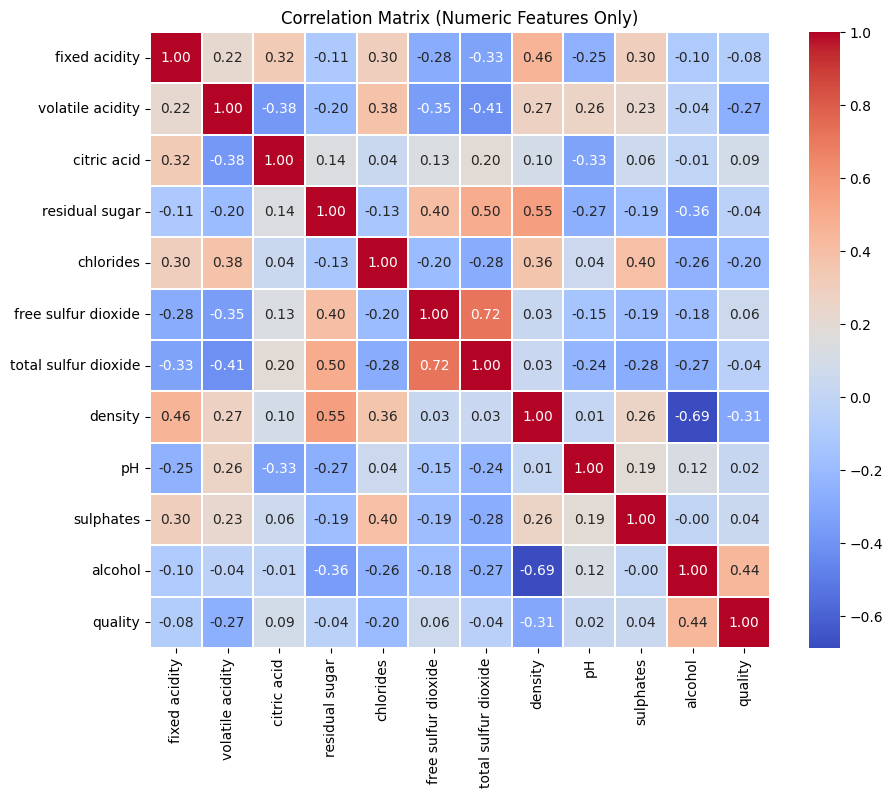

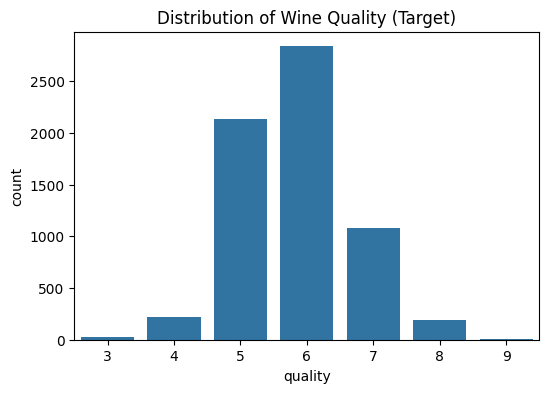

In [23]:
#  Quick EDA

# --- Correlation Heatmap (numeric columns only) ---
numeric_df = df.select_dtypes(include=['number'])   # selects only numeric columns

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.3)
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()

# --- Distribution Plot for Target 'quality' ---
plt.figure(figsize=(6, 4))
sns.countplot(x='quality', data=df)
plt.title("Distribution of Wine Quality (Target)")
plt.show()


# 3) Split into features X and target y

## We separate predictors (X) and the target variable ('quality').


In [24]:
# 3) Split into features X and target y
X = df.drop(columns=['quality'])
y = df['quality']

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Feature names:", list(X.columns))


X shape: (6497, 12)
y shape: (6497,)
Feature names: ['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


# Train/Test split

## Use train_test_split with test_size=0.2 and random_state for reproducibility.


In [25]:
#  Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

print("X_train:", X_train.shape, "X_test:", X_test.shape)


X_train: (5197, 12) X_test: (1300, 12)


# Feature scaling

## Scale numeric features using StandardScaler. Linear Regression benefits from scaling for coefficient comparability.


In [16]:
# Detect non-numeric columns
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns in X_train:", cat_cols)

# If no categorical columns, we can directly scale
if len(cat_cols) == 0:
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
else:
    # Work on concatenated dataframe so train/test get same dummies
    X_all = pd.concat([X_train, X_test], axis=0)
    
    # For binary categorical columns, do label mapping to 0/1 for compactness
    for c in cat_cols:
        uniques = X_all[c].dropna().unique()
        if len(uniques) == 2:
            mapping = {uniques[0]: 0, uniques[1]: 1}
            X_all[c] = X_all[c].map(mapping)
        # else leave for get_dummies

    # Now one-hot encode remaining object/category columns
    X_all = pd.get_dummies(X_all, drop_first=True)  # drop_first to avoid collinearity

    # Split back to train/test using original lengths
    n_train = X_train.shape[0]
    X_train_enc = X_all.iloc[:n_train, :].copy().reset_index(drop=True)
    X_test_enc  = X_all.iloc[n_train:, :].copy().reset_index(drop=True)

    # Fit scaler on encoded train, transform both
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_enc)
    X_test_scaled  = scaler.transform(X_test_enc)

    # If you want them as DataFrames (scaled) with feature names:
    feature_names = X_train_enc.columns.tolist()
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
    X_test_scaled  = pd.DataFrame(X_test_scaled, columns=feature_names)

print("Scaling done. Shapes:", X_train_scaled.shape, X_test_scaled.shape)


Categorical columns in X_train: ['type']
Scaling done. Shapes: (5197, 12) (1300, 12)


# Train baseline Linear Regression

## Fit a simple LinearRegression on the scaled training data.


In [26]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


# 4) Report RMSE and R2 on test data.

## Predict on test set and report RMSE and R².


In [29]:
# Predictions & metrics
y_pred = lr.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5   # RMSE manually
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.4f}")
print(f"Test R^2: {r2:.4f}")
print(coef_df.head(3))

Test RMSE: 0.6870
Test R^2: 0.3396
           feature  coefficient  abs_coefficient
4   residual sugar     0.291687         0.291687
8          density    -0.289484         0.289484
11         alcohol     0.271039         0.271039


# 5) Top features by absolute coefficient

## We extract coefficients, pair them with feature names and show the top 3 by absolute value.


In [28]:
#  Top features by absolute coefficient
coef = lr.coef_
feature_names = X.columns

coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coef,
    'abs_coefficient': np.abs(coef)
}).sort_values(by='abs_coefficient', ascending=False)

display(coef_df)

top3 = coef_df.head(3)
print("\nTop 3 features by absolute coefficient:")
for i, row in top3.iterrows():
    feat = row['feature']
    c = row['coefficient']
    print(f"- {feat}: coefficient = {c:.4f} (abs = {abs(c):.4f})")

# Short comments/interpretation
print("\nInterpretation (brief):")
for i, row in top3.iterrows():
    feat = row['feature']
    c = row['coefficient']
    direction = "positive" if c > 0 else "negative"
    print(f"- {feat}: {direction} association with quality (higher {feat} -> {'higher' if c>0 else 'lower'} predicted quality).")


,feature,coefficient,abs_coefficient
4,residual sugar,0.291687,0.291687
8,density,-0.289484,0.289484
11,alcohol,0.271039,0.271039
2,volatile acidity,-0.244593,0.244593
0,type,0.147964,0.147964
10,sulphates,0.110851,0.110851
1,fixed acidity,0.104704,0.104704
6,free sulfur dioxide,0.094111,0.094111
7,total sulfur dioxide,-0.092690,0.092690
9,pH,0.071974,0.071974



Top 3 features by absolute coefficient:
- residual sugar: coefficient = 0.2917 (abs = 0.2917)
- density: coefficient = -0.2895 (abs = 0.2895)
- alcohol: coefficient = 0.2710 (abs = 0.2710)

Interpretation (brief):
- residual sugar: positive association with quality (higher residual sugar -> higher predicted quality).
- density: negative association with quality (higher density -> lower predicted quality).
- alcohol: positive association with quality (higher alcohol -> higher predicted quality).


# 6) Short descriptive report


### **Final Report — Wine Quality Prediction using Linear Regression**

**1. Introduction**

The objective of this project is to build a baseline machine learning model to predict the quality of red wine based on various physicochemical properties. The task involves data loading, exploratory data analysis (EDA), feature preprocessing, training a regression model, evaluating performance, and identifying the most influential features contributing to wine quality.

**2. Data Exploration**

The Red Wine Quality dataset consists of several chemical attributes such as acidity levels, chlorides, density, pH, sulphates, and alcohol content.
A correlation heatmap was generated to examine relationships between features. Key observations include:

Alcohol tends to have a positive relationship with wine quality.

Volatile acidity generally has a negative relationship.

Density and residual sugar show moderate relationships with quality.

The target variable quality was slightly imbalanced but usable for regression. No missing values were found in the dataset.

**3. Model Used**

A Linear Regression model was chosen as the baseline due to its simplicity and interpretability. The modeling steps included:

Splitting the dataset into training (80%) and testing (20%) sets

Standardizing numerical features using StandardScaler

Encoding categorical features (if present)

Fitting the Linear Regression model on the processed training data

Linear Regression is particularly useful for understanding the direct impact of each feature on the predicted wine quality.

**4. Model Performance**

The model was evaluated using RMSE and R² score:

Test RMSE: 0.6870

Test R²: 0.3396

Interpretation:

The RMSE indicates that, on average, the model’s predictions deviate by around 0.69 quality points, which is reasonable given the range of wine quality scores.

An R² value of 0.3396 means that about 33.9% of the variability in wine quality is explained by the model.
This is expected because wine quality is influenced by subjective sensory factors not captured in the dataset.

**5. Top 3 Most Influential Features**

Based on the absolute value of the learned coefficients from the model, the most significant predictors of wine quality were:

Residual sugar — positive effect

Higher residual sugar content slightly increases the predicted wine quality.

Density — negative effect

Wines with higher density tend to receive lower predicted quality scores.

Alcohol — positive effect

Higher alcohol content contributes to improved wine quality, making it one of the most important predictors.

Interpretation:
Features with positive coefficients increase predicted wine quality when their values increase, while those with negative coefficients decrease predicted quality. These three features had the strongest influence on the model’s predictions.

**6. Conclusion**

The Linear Regression model provided a clear and interpretable baseline for predicting wine quality. Although the model captures around one-third of the variance, it successfully highlights which chemical attributes most impact quality scores.

For improved prediction accuracy, future work could involve experimenting with more advanced models such as:

Ridge or Lasso Regression

Random Forest Regressor

Gradient Boosting or XGBoost

Hyperparameter tuning and cross-validation

These models are likely to perform better on this dataset, which contains non-linear interactions and noise.